<img src="https://canada.unam.mx/wp-content/uploads/2018/12/FESAc.png" alt="Portada" style="float: left; margin-right: 50px" />

<h1>Licenciatura en Matematicas Aplicadas y Computación</h1>
<h1>Métodos Numéricos 2</h1>
<h2 style="color:#1a4996">Mtra. Teresa Carrillo Ramírez</h2>
<h2 style="color:#1a4996">Alfonso Flores Zenteno</h2>

___

# Mínimos Cuadrados

El método de mínimos cuadrados nos permite crear un polinomio de grado 'n' que se ajusta a un conjunto de puntos en el plano. En este tutorial seguiremos el algoritmo para generar polinomios de diferentes grados y comparar su grado de error.
Para obtener un polinomio del grado 'n' se deben seguir los siguientes pasos:

1. Calcular el número de operaciones a realizar y hacer las sumatorias necesarias.
2. Crear el sistema de ecuaciones 
3. Resolver el sistema de ecuaciones
4. Formar los polinomios


Para realizar este ejercicio utilizaremos el siguiente conjunto de datos:

| xi  |  yi  |
|-----|------|
| 0.1 | 0.61 |
| 0.4 | 0.92 |
| 0.5 | 0.99 |
| 0.7 | 1.52 |
| 0.8 | 1.47 |
| 0.9 | 2.03 |

Construiremos polinomios de 1º, 2º y 3º grado. Primero debemos confirmar cuál es el grado máximo de polinomio que podemos realizar con nuestros datos, esto lo hacemos con el siguiente cálculo:

$$N_{max} = m - 1$$

Donde $m$ es la cantidad de puntos proporcionados. Para este ejercicio es más fácil trabajar con listas separadas de datos para $x$ y para $y$.

In [1]:
# En esta lista guardamos los valores de cada xi
VX = [ 0.1, 0.4, 0.5, 0.7, 0.8, 0.9 ]

# y en esta guardamos los valores de los yi correspondientes
VY = [ 0.61, 0.92, 0.99, 1.52, 1.47, 2.03]

# Esta es la cantidad de datos proporcionados
m = len(VX)

# El grado más alto de polinomio que podemos crear es:
print( m - 1 )

5


Ahora que verificamos el grado máximo y nos encontramos dentro del límite, hay que observar nuestros datos para visualizar cuál polinomio puede ser de mayor utilidad.

In [2]:
import matplotlib.pyplot as plt

plt.plot(VX, VY, 'bo')
plt.show()

<Figure size 640x480 with 1 Axes>

Parece que una simple regresión lineal podría ajustarse bien a nuestros datos pero vamos a comparar este resultado con polinomios de segundo y tercer grado.

## 1. Calcular el número de operaciones a realizar y hacer las sumatorias necesarias.

Para generar la matriz del sistema de ecuaciones vamos a necesitar $2n + 1$ sumatorias, donde $n$ es el grado del polinomio. Ya que el grado más alto que vamos a considerar es 3, realizaremos 7 sumatorias de la siguiente forma:

$$ \sum_{i=1}^{m} x_{i}^{p} $$
Donde $p$ pertenece al conjunto $\{0, 1, 2, 3, 4, 5, 6\}$. 
Almacenaremos los resultados en listas para trabajar más facilmente con los resultados.

In [3]:
# Inicializamos la lista con ceros
sumas = [0, 0, 0, 0, 0, 0, 0]

# Hacemos todos los cálculos en un solo ciclo for con la función pow() que facilita el cálculo de potencias
for x in VX:
    sumas[1] = sumas[1] + x
    sumas[2] = sumas[2] + pow(x,2)
    sumas[3] = sumas[3] + pow(x,3)
    sumas[4] = sumas[4] + pow(x,4)
    sumas[5] = sumas[5] + pow(x,5)
    sumas[6] = sumas[6] + pow(x,6)
    
# Ya que la potencia cero siempre da igual 1, esta sumatoria es simplemente la cantidad de elementos en el arreglo    
sumas[0] = m
    
print(sumas)

[6, 3.4, 2.3600000000000003, 1.774, 1.3940000000000001, 1.1277400000000002, 0.9309560000000001]


Ahora para generar el vector independiente debemos calcular $n + 1 $ sumas de la forma:
$$\sum_{i=1}^{m}y_i x_{i}^{t} $$
Donde $t$ pertenece al conjunto $\{ 0, 1, 2, 3\}$, recordemos que $n$ es el grado del polinomio a calcular.

In [4]:
# Inicializamos la lista para el vector independiente
indp = [0, 0, 0, 0]

# Realizamos un ciclo para acceder a los elementos de ambos arreglos (Xl, Yl)
for i in range(0, len(VX)):
    indp[0] = indp[0] + VY[i]
    indp[1] = indp[1] + ( VY[i]*pow(VX[i],1))
    indp[2] = indp[2] + ( VY[i]*pow(VX[i],2))
    indp[3] = indp[3] + ( VY[i]*pow(VX[i],3))
    
print(indp)

[7.539999999999999, 4.991, 3.7307, 2.93711]


In [5]:
# Creamos una función que nos permita vizualizar matrices más fácil
def printMatrix(M):
    for l in M:
        print(l)

## 2. Crear el sistema de ecuaciones
Ahora debemos llenar la matriz de coeficientes siguiendo el orden correcto. El tamaño de esta matriz dependerá del grado del polinomio que queremos construir. Empecemos por el polinomio de 3º grado, este tiene 4 incógnitas por lo que debemos llenar una matriz de $(4x4)$. Haremos esto renglón por renglón, para el primer renglón empezamos con el valor de las sumas elevadas a la potencia cero y continuamos añadiendo potencias sucesivas hasta que el renglón tenga 4 elementos. Para el siguiente renglón debemos empezar con las sumas elevadas a la primer potencia, el tercero empieza con las sumas a la segunda potencia y el cuarto comienza con sumas a la tercer potencia. Al final debemos tener una matriz cuadrada en la que se ven reflejados todos los coeficientes calculados en el paso anterior.

In [6]:
# Inicializamos matriz para el polinomio de 3º grado
M_3 = []

# Comenzamos definiendo el grado del polinomio 
grado = 3

# Iteramos desde cero hasta n+1 para crear nuestra matrix de 4x4
for i in range(0, grado + 1):
    M_3.append(sumas[i:i+grado+1])

# Observamos los resultados de nuestra matriz
printMatrix(M_3)

[6, 3.4, 2.3600000000000003, 1.774]
[3.4, 2.3600000000000003, 1.774, 1.3940000000000001]
[2.3600000000000003, 1.774, 1.3940000000000001, 1.1277400000000002]
[1.774, 1.3940000000000001, 1.1277400000000002, 0.9309560000000001]


Ahora podemos hacer los mismos cálculos para crear las matrices para el polinomio de 2º y el lineal, simplemente hay que cambiar la variable **grado** según se necesite. Otra opción es simplemente partir de la matriz que ya tenemos y tomar las primeras 3 columnas y renglones para la matriz del polinomio de 2º grado o los primeros 2 renglones y columnas para el polinomio lineal.

In [7]:
# Inicializamos las matrices vacías
M_2 = []
M_1 = []

# Primero llenamos la matriz de 3x3
for i in range(0,3):
    M_2.append(M_3[i][0:3])
    
# Ahora la matriz de de 2x2
for i in range(0,2):
    M_1.append(M_3[i][0:2])

# Verificamos las matriz de 3x3
printMatrix(M_2)

print('-----------------------')
# Verificamos la matriz de 2x2
printMatrix(M_1)

[6, 3.4, 2.3600000000000003]
[3.4, 2.3600000000000003, 1.774]
[2.3600000000000003, 1.774, 1.3940000000000001]
-----------------------
[6, 3.4]
[3.4, 2.3600000000000003]


El vector independiente lo calculamos en el paso anterior y para utilizarlo simplemente tomamos el número de elementos que se necesiten, 4, 3 o 2.

## 3. Resolver el sistema de ecuaciones

Ya que tenemos las matrices y vectores necesarios podemos proceder a resolver los sistemas de ecuaciones y obtener los coeficientes de los polinomios de 3°, 2° y lineal. Para esto utilizaremos la librería **numpy** para resolver rápidamente los sistemas de ecuaciones.

In [8]:
import numpy as np

# Obtenemos la matriz inversa para el polinomio de 3º grado.
MA_I = np.linalg.inv( np.array(M_3) )

# Creamos el arreglo del vector independiente
v_b = np.array(indp)

# Obtenemos los coeficientes multiplicando la matriz inversa por el vector independiente
c_3 = np.matmul(MA_I, v_b)

# Observamos los resultados
printMatrix(c_3)

0.46239167732449005
1.6666887627247888
-2.4051481215765307
2.6916898025392584


In [9]:
# Obtenemos la matriz inversa para el polinomio de 2º grado.
MA_I = np.linalg.inv( np.array(M_2) )

# Creamos el arreglo del vector independiente
v_b = np.array(indp[0:3])

# Obtenemos los coeficientes multiplicando la matriz inversa por el vector independiente
c_2 = np.matmul(MA_I, v_b)

# Observamos los resultados
printMatrix(c_2)

0.6014452423698202
0.04634949132261568
1.5990424895272213


In [10]:
# Obtenemos la matriz inversa para el polinomio lineal
MA_I = np.linalg.inv( np.array(M_1) )

# Creamos el arreglo del vector independiente
v_b = np.array(indp[0:2])

# Obtenemos los coeficientes multiplicando la matriz inversa por el vector independiente
c_1 = np.matmul(MA_I, v_b)

# Observamos los resultados
printMatrix(c_1)

0.3173076923076925
1.657692307692308


## 4. Formar los polinomios

Ahora que tenemos los coeficientes podemos formar los polinomios en el orden correcto tal como podemos ver a continuación. Definamos una función que nos haga los cálculos necesarios para cada polinomio, para después graficar y comparar los errores.

$$P_{3} = 0.462392 + 1.666688x - 2.405148x^{2} + 2.691689x^{3}$$

$$P_{2} = 0.601445 + 0.046349x + 1.599042x^{2}$$

$$P_{1} = 0.317307 + 1.657692x$$

In [11]:
def polinomios(tipo, x):
    
    '''
    Función que recibe dos parámetros, el primero será el tip de polinomio a utilizar:
        1 - lineal
        2 - cuadrático
        3 - cúbico
        
    El segundo parámetro es el valor de x evaluar en el polinomio
    '''
    
    if tipo == 1 :
        return c_1[0] + (c_1[1]*x)
    
    elif tipo == 2 :
        return c_2[0] + (c_2[1]*x) + (c_2[2]*pow(x,2))
    
    elif tipo == 3 :
        return c_3[0] + (c_3[1]*x) + (c_3[2]*pow(x,2)) + (c_3[3]*pow(x,3))
    
    else:
        return null;
    

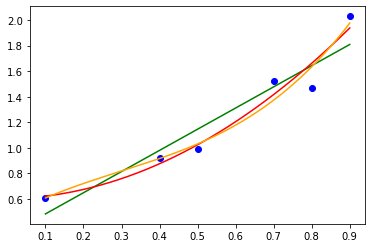

In [12]:
# Ahora procedemos a graficar los polinomios y los puntos originales para comparar polinomios

# Creamos un arreglo con 200 puntos equidistantes dentro del rango [0.1, 0.9]
dom = np.linspace(0.1, 0.9, 200)

plt.plot(VX, VY, 'bo')
plt.plot(dom, [polinomios(1, i) for i in dom], color="green")
plt.plot(dom, [polinomios(2, i) for i in dom], color="red")
plt.plot(dom, [polinomios(3, i) for i in dom], color="orange")

plt.show()

Ya que tenemos una idea de cómo se ajusta cada polinomio a nuestros puntos podemos calcular los errores de cada uno para verificar cuál es mejor.
Para esto debemos sumar las diferencias al cuadrado entre los puntos $y_{i}$ las aproximaciones de nuestros polinomios, de la siguiente forma:

$$\sum_{i=0}^{i<n}( y_{i}-P(x_{i}) )^{2}$$

Donde $n$ es el total de puntos que tenemos.

In [13]:
# Creamos un diccionario que almacene los cálculos del error de cada polinomio
errores = { 'lineal': 0, 'cuadrado': 0, 'cubo': 0}

n = len(VX)

# Iteramos desde 0 hasta n-1
for i in range(0,n):
    errores['lineal'] += (VY[i] - polinomios(1, VX[i]))**2
    errores['cuadrado'] += (VY[i] - polinomios(2, VX[i]))**2
    errores['cubo'] += (VY[i] - polinomios(3, VX[i]))**2

print(errores)

{'lineal': 0.1247576923076922, 'cuadrado': 0.05902474566128081, 'cubo': 0.05302019943642064}


Como se puede apreciar en los resultados anteriores, el polinomio que tiene el menor grado de error es el polinomio cúbico. Se aprecia mejor en la siguiente gráfica:

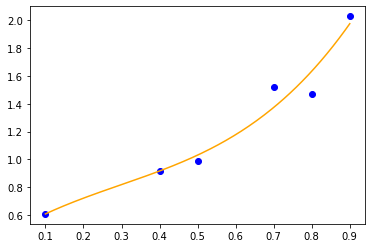

In [14]:
plt.plot(VX, VY, 'bo')
plt.plot(dom, [polinomios(3, i) for i in dom], color="orange")

plt.show()

De esta manera generamos un polinomio que tiene un buen ajuste a nuestros puntos iniciales, este método es bastante fácil y rápido de obtener el polinomio, sin embargo es útil hacer polinomios de varios grados y compararlos según se vean nuestros datos iniciales.